In [4]:
import pandas as pd
import numpy as np
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [5]:
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cat_cols = pd.DataFrame(ohe.fit_transform(df[['species']]).toarray(),columns = df['species'].unique())
df = pd.concat([df, cat_cols], axis=1)
df.drop('species',axis=1, inplace=True)

In [7]:
json_file = pd.read_json('algoparams_from_ui.json')
json_file

,session_name,session_description,design_state_data
algorithms,test,test,{'RandomForestClassifier': {'model_name': 'Ran...
feature_generation,test,test,"{'linear_interactions': [['petal_length', 'sep..."
feature_handling,test,test,{'sepal_length': {'feature_name': 'sepal_lengt...
feature_reduction,test,test,"{'feature_reduction_method': 'Tree-based', 'nu..."
hyperparameters,test,test,"{'stratergy': 'Grid Search', 'shuffle_grid': T..."
metrics,test,test,"{'optomize_model_hyperparameters_for': 'AUC', ..."
probability_calibration,test,test,{'probability_calibration_method': 'Sigmoid - ...
session_info,test,test,"{'project_id': '1', 'experiment_id': 'kkkk-11'..."
target,test,test,"{'prediction_type': 'Regression', 'target': 'p..."
train,test,test,"{'policy': 'Split the dataset', 'time_variable..."


## Reading target and type of regression

In [8]:
target = json_file.loc['target','design_state_data']['target']
type_of_reg = json_file.loc['target','design_state_data']['type']

## Applying missing imputation that needs to be applied to the columns in the dataframe

In [9]:
feature_handling_dic= json_file.loc['feature_handling','design_state_data']
feature_handling_dic

{'sepal_length': {'feature_name': 'sepal_length',
  'is_selected': True,
  'feature_variable_type': 'numerical',
  'feature_details': {'numerical_handling': 'Keep as regular numerical feature',
   'rescaling': 'No rescaling',
   'make_derived_feats': False,
   'missing_values': 'Impute',
   'impute_with': 'Average of values',
   'impute_value': 0}},
 'sepal_width': {'feature_name': 'sepal_width',
  'is_selected': True,
  'feature_variable_type': 'numerical',
  'feature_details': {'numerical_handling': 'Keep as regular numerical feature',
   'rescaling': 'No rescaling',
   'make_derived_feats': False,
   'missing_values': 'Impute',
   'impute_with': 'custom',
   'impute_value': -1}},
 'petal_length': {'feature_name': 'petal_length',
  'is_selected': True,
  'feature_variable_type': 'numerical',
  'feature_details': {'numerical_handling': 'Keep as regular numerical feature',
   'rescaling': 'No rescaling',
   'make_derived_feats': False,
   'missing_values': 'Impute',
   'impute_with': '

In [10]:
def feature_handling(feature_handling, column_names,df):
    for col in column_names:
        try:
            if feature_handling[col]['feature_details']['impute_with'] == 'custom':
                df[col] = df[col].fillna(feature_handling[col]['feature_details']['impute_value'])
            elif feature_handling[col]['feature_details']['impute_with'] == 'Average of values': 
                df[col] = df[col].fillna(df[col].mean())
        except KeyError:
            print(col,"feature does not have 'impute_with' provided")
    return df

In [11]:
feature_handling(feature_handling_dic, df.columns, df)

Iris-setosa feature does not have 'impute_with' provided
Iris-versicolor feature does not have 'impute_with' provided
Iris-virginica feature does not have 'impute_with' provided


,sepal_length,sepal_width,petal_length,petal_width,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.0,0.0,1.0
146,6.3,2.5,5.0,1.9,0.0,0.0,1.0
147,6.5,3.0,5.2,2.0,0.0,0.0,1.0
148,6.2,3.4,5.4,2.3,0.0,0.0,1.0


## Creating model objects

In [12]:
type_of_reg

'regression'

In [13]:
json_file.loc['algorithms']['design_state_data']

{'RandomForestClassifier': {'model_name': 'Random Forest Classifier',
  'is_selected': False,
  'min_trees': 10,
  'max_trees': 30,
  'feature_sampling_statergy': 'Default',
  'min_depth': 20,
  'max_depth': 30,
  'min_samples_per_leaf_min_value': 5,
  'min_samples_per_leaf_max_value': 50,
  'parallelism': 0},
 'RandomForestRegressor': {'model_name': 'Random Forest Regressor',
  'is_selected': True,
  'min_trees': 10,
  'max_trees': 20,
  'feature_sampling_statergy': 'Default',
  'min_depth': 20,
  'max_depth': 25,
  'min_samples_per_leaf_min_value': 5,
  'min_samples_per_leaf_max_value': 10,
  'parallelism': 0},
 'GBTClassifier': {'model_name': 'Gradient Boosted Trees',
  'is_selected': False,
  'num_of_BoostingStages': [67, 89],
  'feature_sampling_statergy': 'Fixed number',
  'learningRate': [],
  'use_deviance': True,
  'use_exponential': False,
  'fixed_number': 22,
  'min_subsample': 1,
  'max_subsample': 2,
  'min_stepsize': 0.1,
  'max_stepsize': 0.5,
  'min_iter': 20,
  'max_i

##### Since our prediction type is  'regression'  we will select
1. 'RandomForestRegressor', 
2. 'GBTRegressor', 
3. 'LinearRegression', 
5. 'RidgeRegression', 
6. 'LassoRegression', 
7. 'ElasticNetRegression',
8. 'DecisionTreeRegressor',
9. 'neural_network'  

In [14]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### 1.Random Forest Regressor

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
RandomForestRegressor_params = {'model_name': 'Random Forest Regressor',
                        'is_selected': True,
                        'min_trees': 10,
                        'max_trees': 20,
                        'feature_sampling_statergy': 'Default',
                        'min_depth': 20,
                        'max_depth': 25,
                        'min_samples_per_leaf_min_value': 5,
                        'min_samples_per_leaf_max_value': 10,
                        'parallelism': 0}
rf_param_metrics = [{'n_estimators':[10,15,20]},
                    {'max_depth':[20,23,25]},
                    {'min_samples_leaf':[5,7,10]}]
from sklearn.model_selection import GridSearchCV
rf_gs = GridSearchCV(estimator=RandomForestRegressor(),param_grid=rf_param_metrics)
rf_gs.fit(df.drop(target, axis=1), df[target])
rf_reg = rf_gs.best_estimator_
rf_reg.predict(df.drop(target, axis=1))

array([0.25436611, 0.17795166, 0.20254993, 0.17745973, 0.24632581,
       0.35570654, 0.23837496, 0.25115738, 0.1987974 , 0.16238067,
       0.26564564, 0.28279499, 0.18260342, 0.19219866, 0.2651822 ,
       0.2712783 , 0.2651822 , 0.25436611, 0.35570654, 0.27291622,
       0.34394346, 0.26902562, 0.24041919, 0.32272791, 0.32480888,
       0.2437689 , 0.31808349, 0.2473631 , 0.23787464, 0.22737077,
       0.20759273, 0.25540588, 0.25902073, 0.26613549, 0.16238067,
       0.19667223, 0.25118727, 0.16238067, 0.19219866, 0.2560052 ,
       0.24885746, 0.21142366, 0.20175287, 0.32595712, 0.37559773,
       0.18260342, 0.33236546, 0.20229328, 0.25775919, 0.21563455,
       1.50787704, 1.50593499, 1.57356913, 1.16179127, 1.41482361,
       1.42212181, 1.5075862 , 1.01070932, 1.4229119 , 1.22974616,
       1.01718551, 1.34117882, 1.16306614, 1.42590074, 1.17990123,
       1.38260523, 1.48896243, 1.24251073, 1.40084209, 1.16522831,
       1.58072916, 1.27563494, 1.46406133, 1.4169196 , 1.32150

In [16]:
rf_mse = mean_squared_error(rf_reg.predict(df.drop(target, axis=1)), df[target])

## 2.GBT Regressor

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
GBTRegressor_params: {'model_name': 'Gradient Boosted Trees',
  'is_selected': False,
  'num_of_BoostingStages': [67, 89],
  'feature_sampling_statergy': 'Fixed number',
  'use_deviance': True,
  'use_exponential': False,
  'fixed_number': 22,
  'min_subsample': 1,
  'max_subsample': 2,
  'min_stepsize': 0.1,
  'max_stepsize': 0.5,
  'min_iter': 20,
  'max_iter': 40,
  'min_depth': 5,
  'max_depth': 7}
gb_param_metrics = [{'n_estimators':[67,89]},
                   {'min_samples_leaf':[1,2]},
                   {'max_depth':[5,7]},
                    {'min_impurity_decrease':[0.1,0.5]},
                    {'n_iter_no_change':[20,40]}
                   ]
gb_gs = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=gb_param_metrics)
gb_gs.fit(df.drop(target, axis=1), df[target])
gb_reg = gb_gs.best_estimator_
gb_reg.predict(df.drop(target, axis=1))

array([0.2789035 , 0.24377161, 0.24377161, 0.24377161, 0.2789035 ,
       0.35006465, 0.25325078, 0.2789035 , 0.24377161, 0.24377161,
       0.2789035 , 0.28571497, 0.24377161, 0.24377161, 0.2789035 ,
       0.2789035 , 0.2789035 , 0.2789035 , 0.35006465, 0.2789035 ,
       0.35006465, 0.2789035 , 0.25325078, 0.35006465, 0.32441194,
       0.30188853, 0.31136769, 0.2789035 , 0.2789035 , 0.27623581,
       0.27623581, 0.2789035 , 0.2789035 , 0.2789035 , 0.24377161,
       0.26942433, 0.2789035 , 0.24377161, 0.24377161, 0.2789035 ,
       0.2789035 , 0.24377161, 0.24377161, 0.31136769, 0.35006465,
       0.24377161, 0.31136769, 0.24377161, 0.2789035 , 0.2789035 ,
       1.46975021, 1.46975021, 1.59404549, 1.21589644, 1.40551274,
       1.39945478, 1.5012342 , 1.00600114, 1.41540323, 1.21589644,
       1.03165386, 1.35637318, 1.21589644, 1.40934526, 1.14403308,
       1.36243114, 1.46369224, 1.21589644, 1.40551274, 1.21589644,
       1.59936947, 1.21589644, 1.52881158, 1.39945478, 1.30808

In [18]:
gb_mse = mean_squared_error(gb_reg.predict(df.drop(target, axis=1)), df[target])

## 3. Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
LinearRegression: {'model_name': 'LinearRegression',
  'is_selected': False,
  'parallelism': 2,
  'min_iter': 30,
  'max_iter': 50,
  'min_regparam': 0.5,
  'max_regparam': 0.8,
  'min_elasticnet': 0.5,
  'max_elasticnet': 0.8}
lin_reg = LinearRegression()
lin_reg.fit(df.drop(target, axis=1), df[target])
lin_reg.predict(df.drop(target, axis=1))

array([ 0.24014568,  0.1342577 ,  0.1790507 ,  0.21174828,  0.27458958,
        0.38387418,  0.26255738,  0.24874845,  0.1566694 ,  0.18332048,
        0.28574862,  0.29179513,  0.14373364,  0.11882887,  0.25046437,
        0.4320966 ,  0.28749494,  0.24014568,  0.33047841,  0.33914439,
        0.25903434,  0.31417643,  0.21611408,  0.26249417,  0.36407956,
        0.17297139,  0.27284326,  0.25476455,  0.20570178,  0.25133513,
        0.21689122,  0.21084472,  0.40457237,  0.37701772,  0.18332048,
        0.12652809,  0.17814713,  0.18332048,  0.15754256,  0.23927252,
        0.2255268 , -0.02670915,  0.2074785 ,  0.29781123,  0.43552363,
        0.14373364,  0.3632392 ,  0.21262144,  0.29522456,  0.19968567,
        1.43855549,  1.44722148,  1.47125308,  1.18731911,  1.36196848,
        1.41368114,  1.529855  ,  1.10047901,  1.37746051,  1.29152398,
        1.03932083,  1.37238078,  1.11497148,  1.44893499,  1.23127175,
        1.3697309 ,  1.47309301,  1.282858  ,  1.21649366,  1.20

In [20]:
lin_mse = mean_squared_error(lin_reg.predict(df.drop(target, axis=1)), df[target])

## 4. Ridge regression

In [21]:
from sklearn.linear_model import Ridge
RidgeRegression: {'model_name': 'RidgeRegression',
  'is_selected': False,
  'regularization_term': 'Specify values to test',
  'min_iter': 30,
  'max_iter': 50,
  'min_regparam': 0.5,
  'max_regparam': 0.8}
ridge_params = [{'max_iter':[30,40,50]},
                 {'alpha':[0.5,0.6,0.7,0.8]}]
ridge_gs = GridSearchCV(Ridge(), param_grid=ridge_params)
ridge_gs.fit(df.drop(target, axis=1), df[target])
ridge_reg = ridge_gs.best_estimator_
ridge_reg.predict(df.drop(target, axis=1))

array([0.2390789 , 0.14845734, 0.18487201, 0.22968837, 0.27149061,
       0.38251501, 0.2678989 , 0.25548651, 0.17727734, 0.19907252,
       0.28128465, 0.30430584, 0.15866262, 0.12446279, 0.22185653,
       0.40611378, 0.26888   , 0.2390789 , 0.32969273, 0.33410693,
       0.27148288, 0.31190051, 0.19867674, 0.27989231, 0.3895321 ,
       0.19506956, 0.28389526, 0.25728237, 0.20666719, 0.27009827,
       0.23768655, 0.21466537, 0.39052093, 0.35370274, 0.19907252,
       0.1258474 , 0.169849  , 0.19907252, 0.17107501, 0.24528123,
       0.22087543, 0.00542474, 0.21548786, 0.30610169, 0.44774195,
       0.15866262, 0.36251569, 0.22348605, 0.29148993, 0.20487133,
       1.43733326, 1.44174747, 1.48214963, 1.19169343, 1.37112523,
       1.42435876, 1.53097669, 1.07627029, 1.38312637, 1.28272624,
       1.03405681, 1.36313478, 1.11846057, 1.46256155, 1.20109169,
       1.36051643, 1.4789769 , 1.27831203, 1.24009377, 1.19749224,
       1.57800016, 1.24149385, 1.41014278, 1.44035512, 1.31831

In [22]:
ridge_mse = mean_squared_error(Ridge.predict(self=ridge_reg,X=df.drop(target, axis=1)), df[target])

## 5. LassoRegression

In [23]:
from sklearn.linear_model import Lasso
lasso_params = [{'max_iter':[30,40,50]},
                 {'alpha':[0.5,0.6,0.7,0.8]}]
lasso_gs = GridSearchCV(Lasso(), param_grid=lasso_params)
lasso_gs.fit(df.drop(target, axis=1), df[target])
lasso_reg = lasso_gs.best_estimator_
lasso_reg.predict(df.drop(target, axis=1))

array([0.59783474, 0.59783474, 0.57236137, 0.62330811, 0.59783474,
       0.67425485, 0.59783474, 0.62330811, 0.59783474, 0.62330811,
       0.62330811, 0.64878148, 0.59783474, 0.52141462, 0.54688799,
       0.62330811, 0.57236137, 0.59783474, 0.67425485, 0.62330811,
       0.67425485, 0.62330811, 0.49594125, 0.67425485, 0.7252016 ,
       0.64878148, 0.64878148, 0.62330811, 0.59783474, 0.64878148,
       0.64878148, 0.62330811, 0.62330811, 0.59783474, 0.62330811,
       0.54688799, 0.57236137, 0.62330811, 0.57236137, 0.62330811,
       0.57236137, 0.57236137, 0.57236137, 0.64878148, 0.7252016 ,
       0.59783474, 0.64878148, 0.59783474, 0.62330811, 0.59783474,
       1.43845601, 1.38750926, 1.48940275, 1.2601424 , 1.41298263,
       1.38750926, 1.43845601, 1.0818288 , 1.41298263, 1.23466903,
       1.13277555, 1.31108915, 1.2601424 , 1.43845601, 1.15824892,
       1.36203589, 1.38750926, 1.28561578, 1.38750926, 1.23466903,
       1.46392938, 1.2601424 , 1.48940275, 1.43845601, 1.33656

In [24]:
lasso_mse = mean_squared_error(Lasso.predict(self=ridge_reg,X=df.drop(target, axis=1)), df[target])

## 6. ElasticNetRegression

In [25]:
from sklearn.linear_model import ElasticNet
ElasticNetRegression: {'model_name': 'Lasso Regression',
  'is_selected': False,
  'regularization_term': 'Specify values to test',
  'min_iter': 30,
  'max_iter': 50,
  'min_regparam': 0.5,
  'max_regparam': 0.8,
  'min_elasticnet': 0.5,
  'max_elasticnet': 0.8}

ela_net_params = [{'l1_ratio' : [0.5,0.6,0.7,0.8]},
                 {'max_iter':[30,40,50]},
                 {'alpha':[0.5,0.6,0.7,0.8]}]
ela_net_gs = GridSearchCV(ElasticNet(),param_grid=ela_net_params)
ela_net_gs.fit(df.drop(target, axis=1), df[target])
ela_net_reg = ela_net_gs.best_estimator_
ela_net_reg.predict(df.drop(target, axis=1))

array([0.46635574, 0.46635574, 0.43530807, 0.4974034 , 0.46635574,
       0.55949873, 0.46635574, 0.4974034 , 0.46635574, 0.4974034 ,
       0.4974034 , 0.52845107, 0.46635574, 0.37321274, 0.40426041,
       0.4974034 , 0.43530807, 0.46635574, 0.55949873, 0.4974034 ,
       0.55949873, 0.4974034 , 0.34216508, 0.55949873, 0.62159406,
       0.52845107, 0.52845107, 0.4974034 , 0.46635574, 0.52845107,
       0.52845107, 0.4974034 , 0.4974034 , 0.46635574, 0.4974034 ,
       0.40426041, 0.43530807, 0.4974034 , 0.43530807, 0.4974034 ,
       0.43530807, 0.43530807, 0.43530807, 0.52845107, 0.62159406,
       0.46635574, 0.52845107, 0.46635574, 0.4974034 , 0.46635574,
       1.49092869, 1.42883336, 1.55302402, 1.27359503, 1.45988102,
       1.42883336, 1.49092869, 1.05626138, 1.45988102, 1.24254737,
       1.11835671, 1.33569036, 1.27359503, 1.49092869, 1.14940437,
       1.39778569, 1.42883336, 1.3046427 , 1.42883336, 1.24254737,
       1.52197635, 1.27359503, 1.55302402, 1.49092869, 1.36673

In [26]:
ela_mse = mean_squared_error(ela_net_reg.predict(df.drop(target, axis=1)), df[target])

## 7. DecisionTreeRegressor

In [27]:
from sklearn.tree import DecisionTreeRegressor
DecisionTreeRegressor: {'model_name': 'Decision Tree',
  'is_selected': False,
  'min_depth': 4,
  'max_depth': 7,
  'use_gini': False,
  'use_entropy': True,
  'min_samples_per_leaf': [12, 6],
  'use_best': True,
  'use_random': True}

dec_tree_params = [{'max_depth':[4,5,6,7]},
              {'min_samples_leaf':[12,6]},
              {'splitter':['best','random']}]
dec_tree_gs = GridSearchCV(DecisionTreeRegressor(),param_grid=dec_tree_params)
dec_tree_gs.fit(df.drop(target, axis=1), df[target])
dec_tree_reg = dec_tree_gs.best_estimator_
dec_tree_reg.predict(df.drop(target, axis=1))

array([0.2375    , 0.15      , 0.2       , 0.2       , 0.2375    ,
       0.34      , 0.2375    , 0.22857143, 0.2       , 0.15      ,
       0.28571429, 0.34      , 0.2       , 0.2       , 0.28571429,
       0.28571429, 0.28571429, 0.2375    , 0.34      , 0.22857143,
       0.34      , 0.22857143, 0.2375    , 0.34      , 0.34      ,
       0.15      , 0.34      , 0.22857143, 0.2375    , 0.2       ,
       0.2       , 0.28571429, 0.22857143, 0.28571429, 0.15      ,
       0.15      , 0.28571429, 0.15      , 0.2       , 0.22857143,
       0.2375    , 0.2       , 0.2       , 0.34      , 0.34      ,
       0.2       , 0.34      , 0.2       , 0.22857143, 0.2375    ,
       1.54545455, 1.54545455, 1.54545455, 1.21666667, 1.42      ,
       1.42      , 1.54545455, 1.0375    , 1.42      , 1.25555556,
       1.0375    , 1.36666667, 1.21666667, 1.42      , 1.25555556,
       1.36666667, 1.54545455, 1.25555556, 1.42      , 1.0375    ,
       1.54545455, 1.36666667, 1.42      , 1.42      , 1.36666

In [28]:
dec_tree_mse = mean_squared_error(dec_tree_reg.predict(df.drop(target, axis=1)), df[target])

## 8. Neural Network

In [29]:
from sklearn.neural_network import MLPRegressor
neural_network: {'model_name': 'Neural Network',
  'is_selected': False,
  'hidden_layer_sizes': [67, 89],
  'activation': '',
  'alpha_value': 0,
  'max_iterations': 0,
  'convergence_tolerance': 0,
  'early_stopping': True,
  'solver': 'ADAM',
  'shuffle_data': True,
  'initial_learning_rate': 0,
  'automatic_batching': True,
  'beta_1': 0,
  'beta_2': 0,
  'epsilon': 0,
  'power_t': 0,
  'momentum': 0,
  'use_nesterov_momentum': False}

MLP_params = [{'hidden_layer_sizes':[67,89]},
             {'alpha':[0]},
             {'tol':[0]},
             {'max_iter':[0]},
             {'early_stopping':[True]},
             {'solver':['adam']},
             {'shuffle':[True]},
             {'learning_rate_init':[0]},
             {'batch_size':['auto']},
             {'beta_1':[0]}, {'beta_2':[0]},
             {'epsilon':[0]},
             {'power_t':[0]},
             {'momentum':[0]},
             {'nesterovs_momentum':[True]}]
MLP_gs = GridSearchCV(MLPRegressor(), param_grid=MLP_params)
MLP_gs.fit(df.drop(target, axis=1), df[target])
MLP_reg = MLP_gs.best_estimator_
MLP_reg.predict(df.drop(target, axis=1))

C:\Users\nehah\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nehah\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nehah\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nehah\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\nehah\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegre

C:\Users\nehah\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\nehah\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\nehah\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\nehah\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\nehah\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\nehah\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature nam

C:\Users\nehah\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\nehah\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\nehah\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\nehah\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\nehah\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\nehah\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature nam

C:\Users\nehah\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nehah\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nehah\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 762, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\nehah\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 385, in _fit
    self._validate_hyperpa

array([0.23285624, 0.23017112, 0.19100957, 0.24605527, 0.22831677,
       0.32822265, 0.21473674, 0.25887232, 0.21099862, 0.25809634,
       0.27168938, 0.28034895, 0.22577673, 0.11937033, 0.21557636,
       0.29996115, 0.2226664 , 0.23285624, 0.34129944, 0.26201243,
       0.33435824, 0.2603599 , 0.11074098, 0.32273557, 0.36838192,
       0.29353694, 0.28790193, 0.26566234, 0.2373957 , 0.2780984 ,
       0.28318767, 0.27538681, 0.27203433, 0.26137584, 0.25809634,
       0.17330944, 0.21929822, 0.25809634, 0.18120604, 0.26264882,
       0.20005013, 0.1940313 , 0.17968009, 0.28713896, 0.37864368,
       0.22577673, 0.28976235, 0.21626269, 0.26791289, 0.23060569,
       1.50926288, 1.43665768, 1.56078251, 1.23179418, 1.45132684,
       1.39567262, 1.49068479, 1.01805659, 1.45794114, 1.21230126,
       1.06179272, 1.32899256, 1.23965115, 1.47183007, 1.14315272,
       1.41062393, 1.3940478 , 1.28490646, 1.38704169, 1.21354394,
       1.48929118, 1.26727755, 1.51172612, 1.46683762, 1.36591

In [30]:
neural_mse = mean_squared_error(MLP_reg.predict(df.drop(target, axis=1)), df[target])

In [32]:
models_perf = {}
for model in [rf_reg, gb_reg, lin_reg, ridge_reg, lasso_reg, ela_net_reg, dec_tree_reg, MLP_reg ]:
    models_perf.update({str(model):[mean_absolute_error(model.predict(df.drop(target, axis=1)), df[target]), 
                                    mean_squared_error(model.predict(df.drop(target, axis=1)), df[target]),
                                   r2_score(model.predict(df.drop(target, axis=1)), df[target])]})

In [33]:
pd.DataFrame(models_perf, index=['mean_abs_error','mean_squared_error','r2_score']).T.sort_values('mean_squared_error')

,mean_abs_error,mean_squared_error,r2_score
DecisionTreeRegressor(min_samples_leaf=6),0.104902,0.018461,0.967039
RandomForestRegressor(min_samples_leaf=5),0.100375,0.018918,0.965752
GradientBoostingRegressor(min_impurity_decrease=0.1),0.109500,0.020550,0.959941
LinearRegression(),0.121259,0.026520,0.951958
Ridge(alpha=0.5),0.120595,0.026775,0.951162
MLPRegressor(beta_1=0),0.131245,0.031810,0.941550
ElasticNet(alpha=0.5),0.221918,0.076999,0.741699
Lasso(alpha=0.5),0.286868,0.123133,0.386378


<AxesSubplot:>

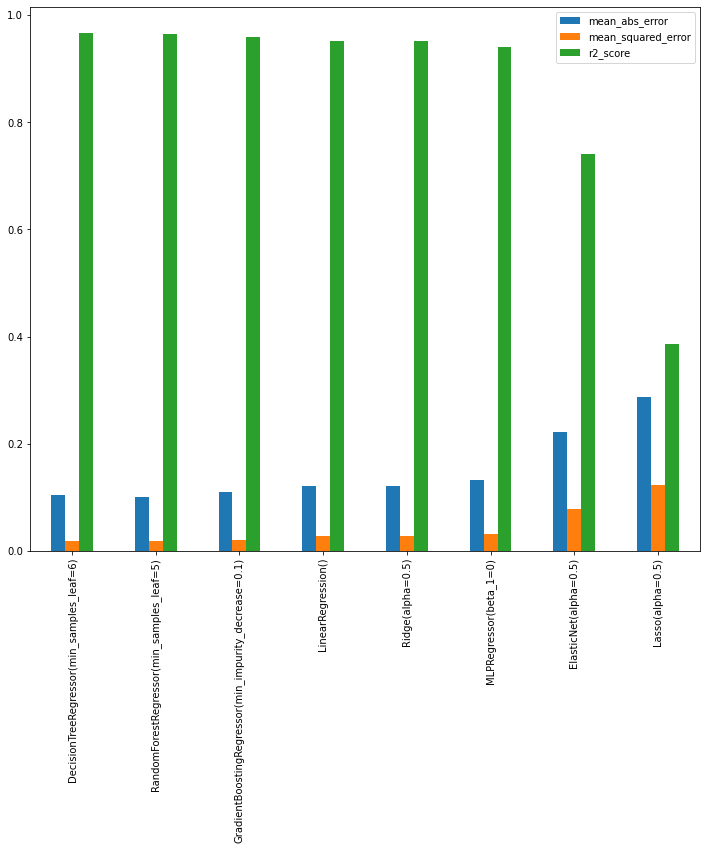

In [34]:
pd.DataFrame(models_perf, index=['mean_abs_error','mean_squared_error','r2_score']).T.sort_values('mean_squared_error').plot(kind = 'bar',figsize=(12,10))